# Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max scaling, also known as normalization, is a data preprocessing technique used to transform features in a dataset to a specific range, usually between 0 and 1. The goal is to rescale the data so that it falls within a similar scale, preventing features with larger numeric ranges from dominating those with smaller ranges.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {'Feature1': [2, 5, 8, 12, 6],
        'Feature2': [20, 50, 10, 8, 25]}
df = pd.DataFrame(data)

In [3]:
df

,Feature1,Feature2
0,2,20
1,5,50
2,8,10
3,12,8
4,6,25


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
 #Creating a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Original Data:")
print(df)
print("\nScaled Data:")
print(scaled_df)

Original Data:
   Feature1  Feature2
0         2        20
1         5        50
2         8        10
3        12         8
4         6        25

Scaled Data:
   Feature1  Feature2
0       0.0  0.285714
1       0.3  1.000000
2       0.6  0.047619
3       1.0  0.000000
4       0.4  0.404762


# Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?Provide an example to illustrate its application.

The Unit Vector technique, also known as vector normalization or unit norm scaling, is a feature scaling method that scales each feature vector to have a unit norm (i.e., a length of 1). It involves dividing each data point by the Euclidean norm of the entire feature vector. This technique is particularly useful when the direction of the data points is more important than their magnitudes.

In [7]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Sample dataset
data = {'Feature1': [2, 8, 5, 12, 6],
        'Feature2': [20, 50, 10, 8, 25]}

df = pd.DataFrame(data)

# Applying Unit Vector scaling
scaler = Normalizer()
normalized_data = scaler.fit_transform(df)

# Creating a DataFrame with the normalized values
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print("Original Data:")
print(df)
print("\nNormalized Data (Unit Vector Scaling):")
print(normalized_df)


Original Data:
   Feature1  Feature2
0         2        20
1         8        50
2         5        10
3        12         8
4         6        25

Normalized Data (Unit Vector Scaling):
   Feature1  Feature2
0  0.099504  0.995037
1  0.157991  0.987441
2  0.447214  0.894427
3  0.832050  0.554700
4  0.233373  0.972387


# Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in the field of machine learning and statistics. 
The primary goal of PCA is to transform a high-dimensional dataset into a new coordinate system (principal components) in such a way that the data variance is maximized along the new axes.
This allows for a reduction in the dimensionality of the data while retaining as much of the original variability as possible.

The principal components are linear combinations of the original features, and they are ordered by the amount of variance they capture. The first principal component (PC1) explains the most variance, followed by the second principal component (PC2), and so on.


The steps involved in PCA are as follows:

1.Standardize the data: Ensure that the features are on a similar scale by subtracting the mean and dividing by the standard deviation.

2. Calculate the covariance matrix of the standardized data.


3.Compute the eigenvectors and eigenvalues of the covariance matrix.

4.Sort the eigenvectors by their corresponding eigenvalues in decreasing order.

5.Choose the top  k eigenvectors to form the new feature space (where 
k is the desired number of dimensions).

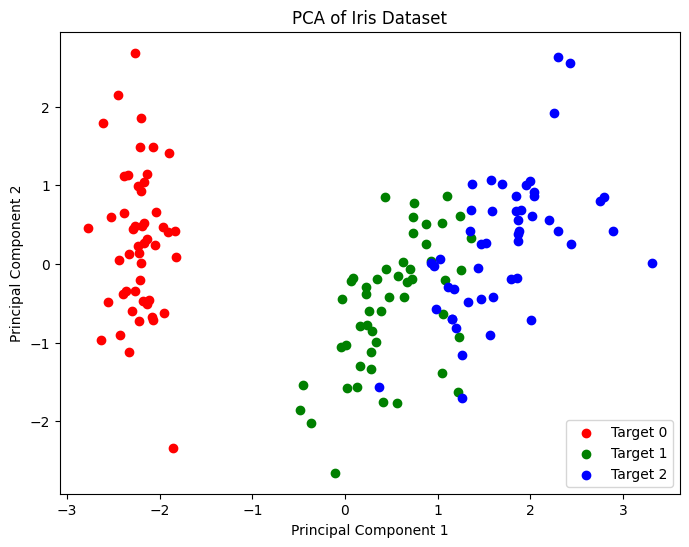

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plot the data in the new 2D space
plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'],
                df_pca.loc[indices_to_keep, 'PC2'],
                c=color,
                label=f'Target {target}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


# Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

PCA (Principal Component Analysis) is often used as a feature extraction technique, and its relationship with feature extraction lies in its ability to transform the original features into a new set of features, called principal components, which are linear combinations of the original features. Feature extraction involves selecting a subset of relevant features or transforming the existing features into a new set of features that capture the essential information in the data.

Here's how PCA can be used for feature extraction:

Dimensionality Reduction: PCA is primarily used for dimensionality reduction, where it identifies a lower-dimensional subspace that retains the most important information in the data. By selecting a subset of principal components, you effectively extract the most relevant features from the original set.

Variance Preservation: PCA orders the principal components based on the amount of variance they capture. The first few principal components typically account for the majority of the variance in the data. By selecting these components, you focus on the aspects of the data that contribute the most to its variability.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
X_train_standardized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_standardized = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Apply PCA for feature extraction
pca = PCA(n_components=10)  # Selecting the top 10 principal components
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

# Train a classifier on the original data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train_standardized, y_train)
y_pred_original = clf_original.predict(X_test_standardized)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train a classifier on the PCA-transformed data
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f'Accuracy on original data: {accuracy_original:.2f}')
print(f'Accuracy on PCA-transformed data: {accuracy_pca:.2f}')


In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
X_train_standardized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_standardized = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

In [18]:
# Apply PCA for feature extraction
pca = PCA(n_components=10)  # Selecting the top 10 principal components
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)


In [19]:
# Train a classifier on the original data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train_standardized, y_train)
y_pred_original = clf_original.predict(X_test_standardized)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train a classifier on the PCA-transformed data
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f'Accuracy on original data: {accuracy_original:.2f}')
print(f'Accuracy on PCA-transformed data: {accuracy_pca:.2f}')

Accuracy on original data: 0.96
Accuracy on PCA-transformed data: 0.95


# Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling topreprocess the data.

import numpy as np

import pandas as pd

price= [20,23,34,45,44]

rating = [5,3,4,3,4]

delievery_time = [10,12,12,13,13]


features = df[[price,rating,delievery_time]]

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
scaled_features = Scaler.fit_transform(features)

# Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

Principal Component Analysis (PCA) is a technique commonly used for dimensionality reduction in datasets with a large number of features. In the context of building a model to predict stock prices, where the dataset includes various features like company financial data and market trends, PCA can help simplify the dataset while retaining the most important information. Here's a step-by-step explanation of how you might use PCA in this scenario:

Understand the Dataset:
Begin by thoroughly understanding the dataset, including the features related to company financial data and market trends. Identify the goals of the analysis and the features that are most relevant to predicting stock prices.

Standardize the Data:
Standardization is important in PCA because it ensures that all the features are on the same scale. This involves subtracting the mean and dividing by the standard deviation for each feature.

Calculate Covariance Matrix:
PCA works by finding the covariance matrix of the dataset. The covariance matrix describes the relationships between all pairs of features, indicating how much they vary together.

Compute Eigenvectors and Eigenvalues:
The next step is to calculate the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance, and eigenvalues indicate the magnitude of variance along those directions.

Sort Eigenvalues:
Arrange the eigenvalues in descending order. The eigenvectors associated with the highest eigenvalues contain the most significant information about the variance in the data.

Select Principal Components:
Decide on the number of principal components (eigenvectors) to retain. You may choose a number that explains a sufficiently high percentage of the total variance (e.g., 95% or 99%).

Projection:
Project the original data onto the selected principal components. This involves multiplying the standardized data by the selected eigenvectors.

Create a Reduced-Dimension Dataset:
Form a new dataset using the projected values on the selected principal components. This dataset will have fewer dimensions than the original one.

Modeling:
Use the reduced-dimension dataset in your stock price prediction model. This can potentially improve model performance by focusing on the most informative features.

Evaluate and Iterate:
Evaluate the performance of your model and iterate as needed. You might need to experiment with the number of principal components to find the right balance between dimensionality reduction and preserving information relevant to stock price prediction.

# Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

Min-Max scaling is a common technique used to scale numerical features to a specific range. The formula for Min-Max scaling is given by:

�
scaled
=
�
−
min
(
�
)
max
(
�
)
−
min
(
�
)
×
(
max range
−
min range
)
+
min range
X 
scaled
​
 = 
max(X)−min(X)
X−min(X)
​
 ×(max range−min range)+min range

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
x = [1,5,10,15,20]

In [38]:
x1 = pd.DataFrame(x)

In [39]:
x1

,0
0,1
1,5
2,10
3,15
4,20


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [40]:
min_max = MinMaxScaler()
min_max.fit_transform(x1)

array([[0.        ],
       [0.21052632],
       [0.47368421],
       [0.73684211],
       [1.        ]])

# Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?


The decision of how many principal components to retain in PCA depends on the level of variance you want to preserve in your data. Retaining a higher number of principal components allows you to capture more variance but increases the dimensionality of your dataset. On the other hand, retaining fewer components reduces dimensionality but might lead to a loss of information.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
X= ['height', 'weight', 'age', 'gender','blood_pressure']


In [54]:
from sklearn.decomposition import PCA

In [59]:
X_standardized = ( X- np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['X1','X2'])
df_pca['Target'] = y
